# Stroke (Brain Attack) Prediction

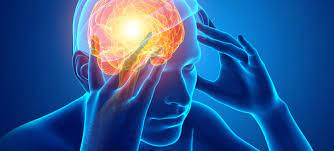

## Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

In recent years, strokes have emerged as a significant public health concern, impacting millions of individuals worldwide. A stroke, often referred to as a "brain attack," is a medical condition that occurs when the blood supply to the brain is interrupted or reduced, leading to severe health consequences and, in some cases, fatalities. Identifying individuals at high risk of stroke is crucial for early intervention and preventive measures.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Dataset Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Attribute

1. id: unique identifier
2. gender: "Male", "Female" or "Other"

3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Some Collected Information/Facts From Sources

1. Stroke is the second most common cause of death in India. About 1,85,000 stroke cases are reported every year in India with nearly one stroke every 40 seconds. One stroke death every 4 min. (Source: AIIMS)
2. 5.2 millons stroks were witressed in children, aged less than 20 years. More risk after 50's.
3. The chance of having a stroke about doubles every 10 years after age 55.
4. The cummualtive incidence of stroke in India ranged from 105 to 152/100,000 persons per year.
5. Main Factors of having Stroke: Highblood Pressure, Diabetes, High Cholesterol and Obesity.
6. Cigarette smoking is a well established risk factor for all forms of stroke.
7. Glucose can result in inc. fatty deposits or clots in blood vessels.
8. Women generally live longer than men, more women have strokes over their lifetimes. Women also have unique risk factors for stroke, including: Having high blood pressure during pregnancy. Using certain types of birth control medicines, espacially if they also smokes.

## Aim

Our Stroke Prediction Project harnesses data science and machine learning algorithms to forecast stroke risk, allowing for early intervention and tailored care. Our goal is to improve patient outcomes and alleviate the strain on healthcare systems through precise predictive modeling.

## Data Analysis

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Optional
warnings.filterwarnings('ignore')

In [4]:
# create a dataframe from dataset
df = pd.read_csv('stroke data.csv')

In [5]:
# check initial 5 records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# stats behind our dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# correlation of dataframe between all columns (without label encoding of columns)
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [9]:
# stats behind our dataframe including object datatype
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [10]:
# check the unique value in object datatype column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [12]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [13]:
# check the null values in dataframe
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Preprocessing 1

In [14]:
'''Remove 'id' columns bcz this is not really useful for our model, and if we
don't remove it our model consider it as real value and make wrong predictions.'''

df.drop('id',axis=1,inplace=True)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Remove null values in 'bmi' column
df.dropna(axis=0,inplace=True)

In [17]:
# identifying index of 'Other' value in 'Gender' column
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
# Remove 'Other' value from gender column bcz their is only value in that column
df = df.drop([3116],axis=0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [20]:
# exploring dataframe using group by of 'work type' column
work_type_gb = df.groupby('work_type')
work_type_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,
Govt_job,50.717460,0.106349,0.052381,107.356825,30.522063,0.044444
Never_worked,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,45.210676,0.090747,0.049466,105.647591,30.307438,0.045196
Self-employed,59.916129,0.166452,0.090323,112.389161,30.211871,0.068387
children,6.877973,0.000000,0.001490,94.009806,20.038003,0.001490


In [21]:
# exploring dataframe using group by of 'Residence type' column
residence_type_gb = df.groupby('Residence_type')
residence_type_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,
Rural,42.621737,0.092225,0.050041,105.632821,28.896898,0.041356
Urban,43.108739,0.091566,0.048996,104.971683,28.892289,0.043775


In [22]:
# exploring dataframe using group by of 'smoking_status' column
smoking_status_gb = df.groupby('smoking_status')
smoking_status_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
Unknown,29.511207,0.028995,0.024949,98.335927,25.666352,0.019555
formerly smoked,54.958134,0.131579,0.083732,112.543038,30.757177,0.068182
never smoked,46.469222,0.116631,0.043737,107.136215,29.982559,0.045356
smokes,46.986431,0.111262,0.074627,106.465699,30.543555,0.052917


In [23]:
# exploring dataframe using group by of 'gender' column
gender_gb = df.groupby('gender')
gender_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.437805,0.086641,0.034518,103.329914,29.065758,0.041422
Male,42.049130,0.099453,0.071109,108.131721,28.647936,0.044257


In [24]:
# exploring dataframe using group by of 'ever_married' column
ever_married_gb = df.groupby('ever_married')
ever_married_gb.mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,
No,21.815798,0.027582,0.016432,96.059742,25.216373,0.013498
Yes,54.065543,0.126092,0.067104,110.210315,30.850749,0.058052


### Exploratory Data Analysis (EDA)

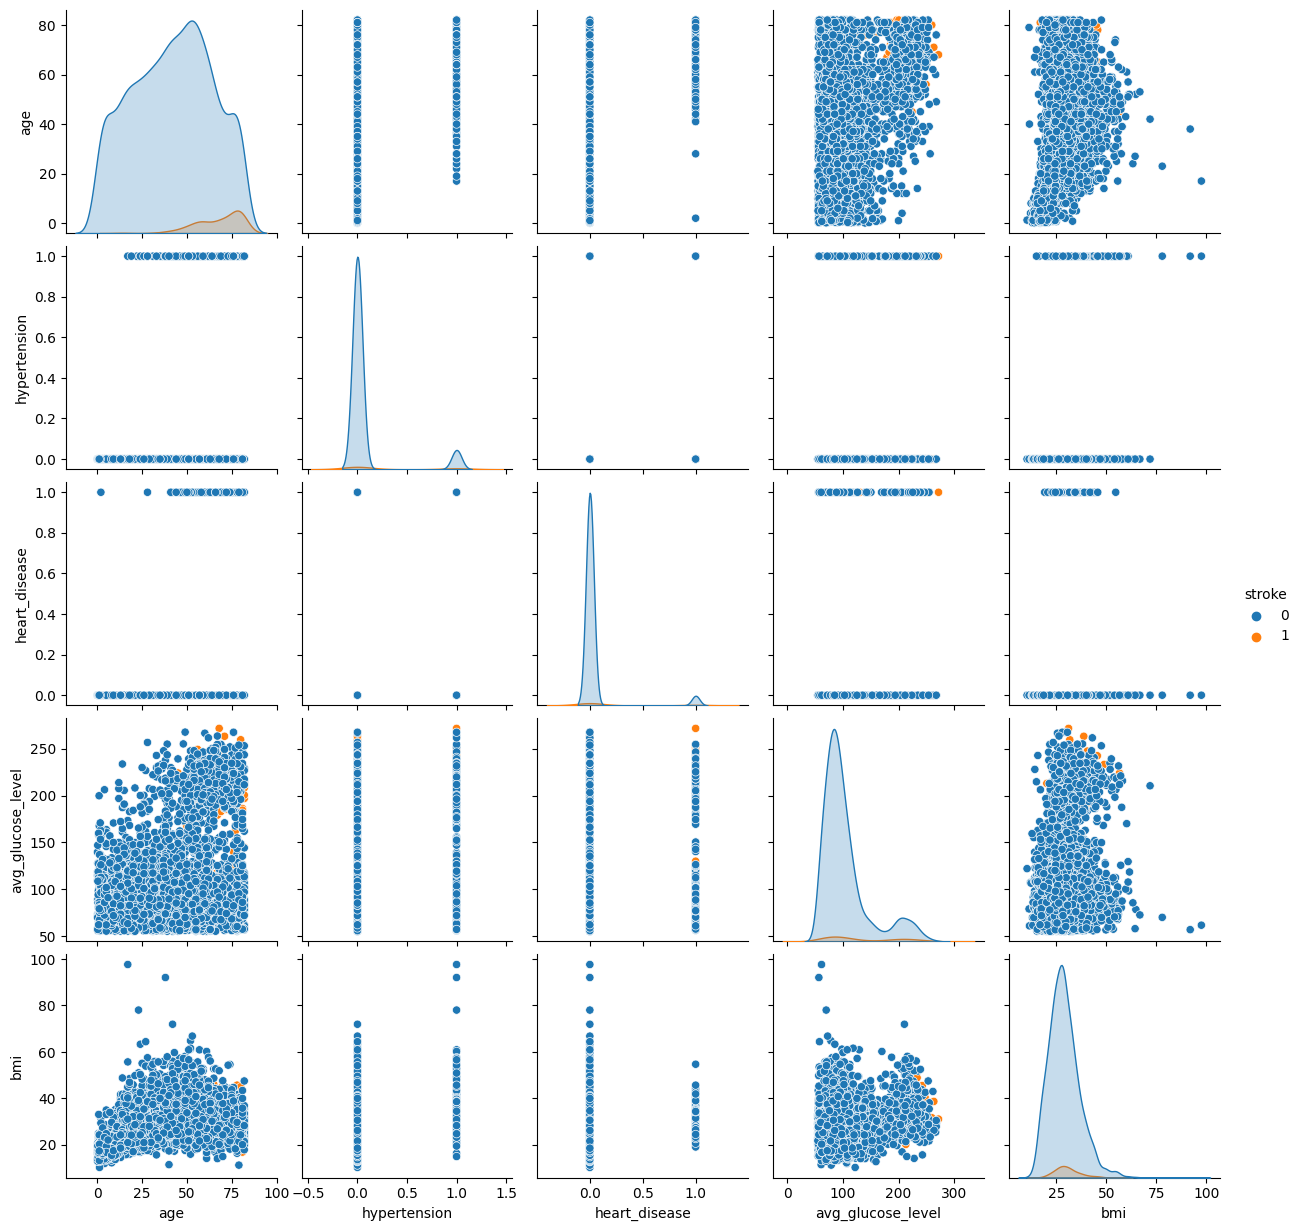

In [25]:
# let's create a lazy plot called pairplot for normal analysis of complete dataset
sns.pairplot(df,hue='stroke')

### Univate Analysis

Text(0.5, 1.02, 'Feature Distribution')

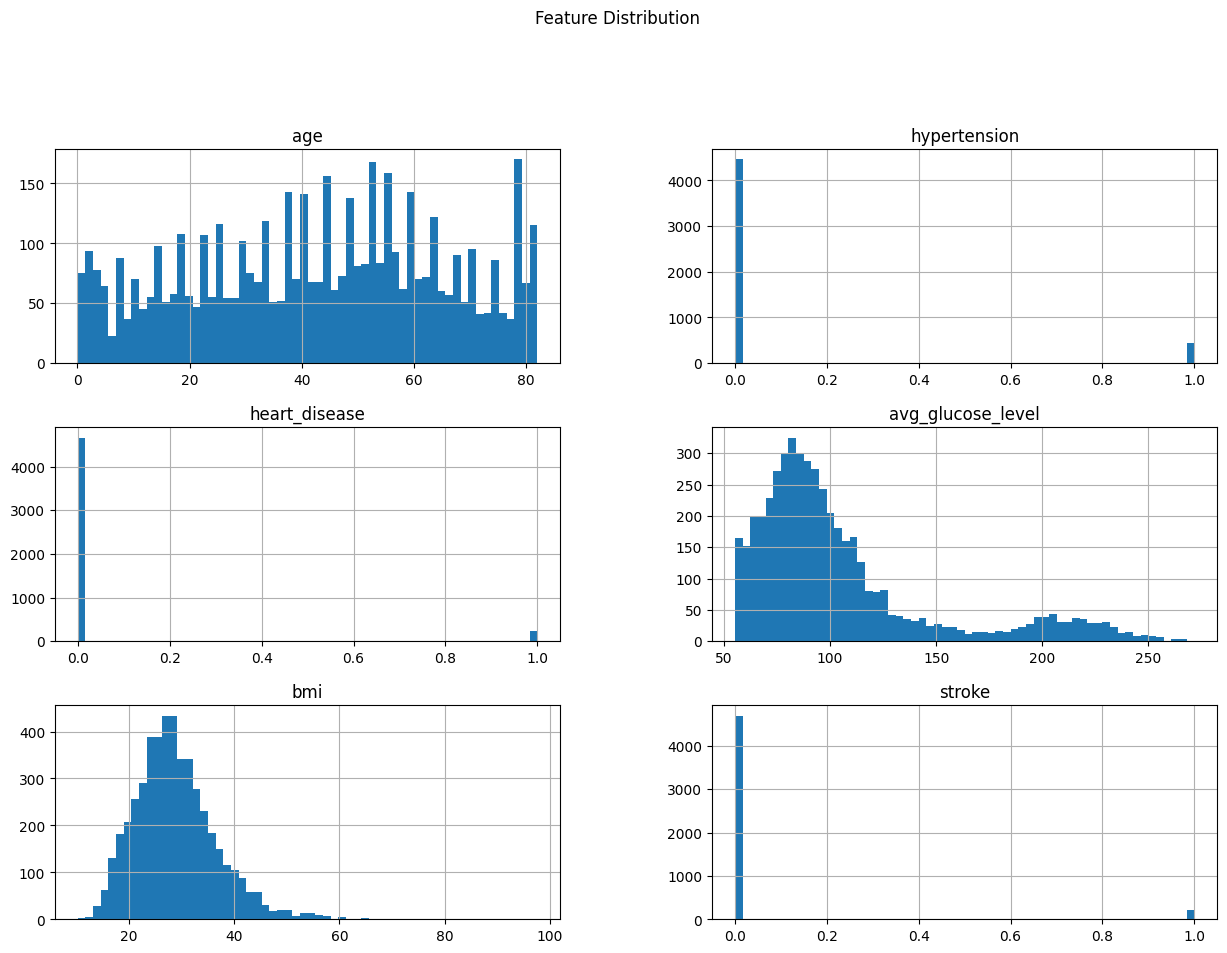

In [26]:
# check the distribution of dataset features
df.hist(bins=60,figsize=(15,10))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.02, 'Feature Distribution')

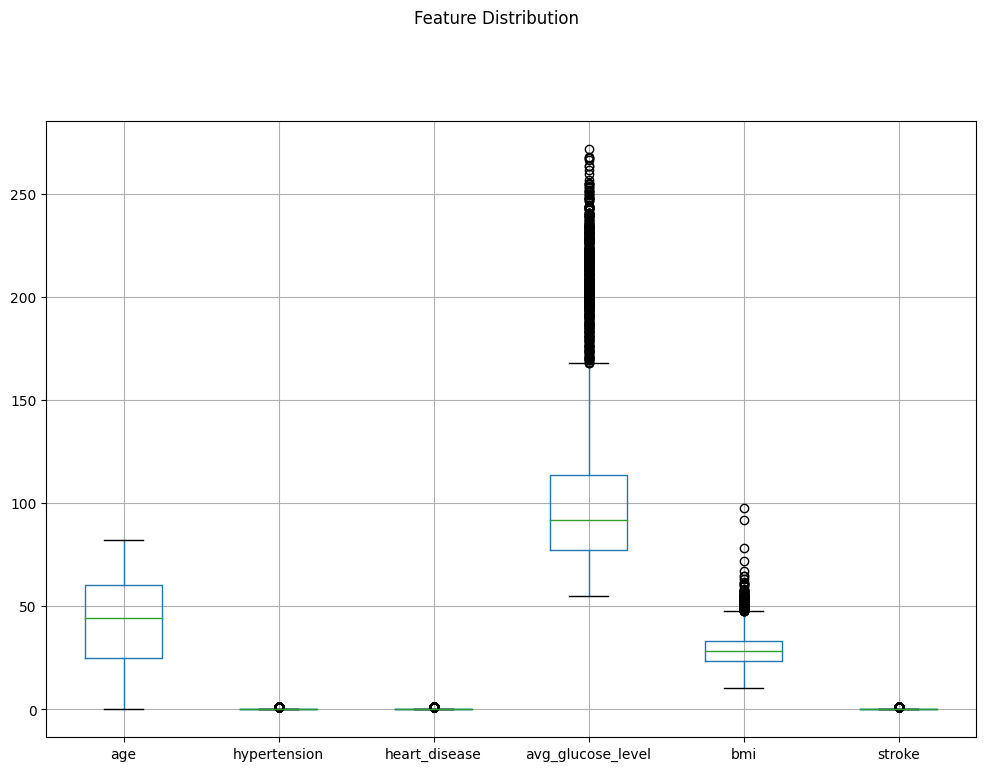

In [27]:
# check the distribution of dataset features using barplot
df.boxplot(figsize=(12,8))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

As we are able to see that column 'avg glucose level' and 'bmi' has more outliers as compare to others.

([<matplotlib.patches.Wedge at 0x7cfa7ae8fd30>,
 [Text(-0.307755600196639, 1.0560712525902818, 'Female'),
  Text(0.30775560019663867, -1.0560712525902818, 'Male')],
 [Text(-0.16786669101634855, 0.5760388650492445, '59%'),
  Text(0.16786669101634835, -0.5760388650492446, '41%')])

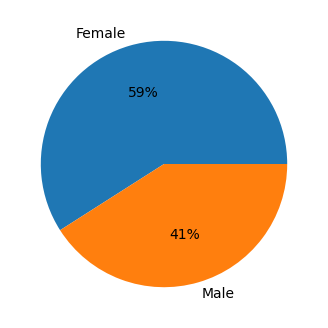

In [28]:
# list for the gender column
gender = ['Female','Male']

# make an object which store value count of the elements in gender column
gender_data = pd.Series(df['gender']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7cfa820d8eb0>,
 [Text(-0.5080276543906456, 0.9756576768387256, 'Married'),
  Text(0.5080277457383074, -0.9756576292737397, 'Not Married')],
 [Text(-0.27710599330398844, 0.5321769146393048, '65%'),
  Text(0.2771060431299858, -0.532176888694767, '35%')])

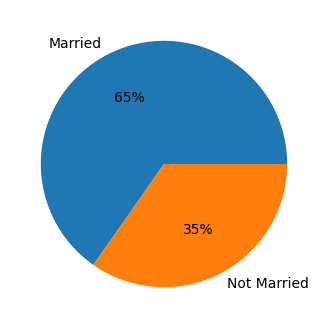

In [29]:
# list for the married column
married = ['Married','Not Married']

# make an object which store value count of the elements in married column
married_data = pd.Series(df['ever_married']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(married_data,labels=married,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7cfa7cfcb1f0>,
 [Text(-0.24849794293519883, 1.0715637042924582, 'Private'),
  Text(-0.6382191091776186, -0.8959220773485421, 'Self-Employed'),
  Text(0.33200713375555313, -1.0486997964791556, 'Children'),
  Text(0.9992078303999088, -0.4599822949500419, 'Govt. Job'),
  Text(1.0998909305275677, -0.015490027217579071, 'Never Worked')],
 [Text(-0.13554433251010845, 0.5844892932504316, '57%'),
  Text(-0.3481195140968828, -0.4886847694628411, '16%'),
  Text(0.1810948002303017, -0.5720180708068121, '14%'),
  Text(0.5450224529454047, -0.25089943360911376, '13%'),
  Text(0.5999405075604914, -0.008449105755043129, '0%')])

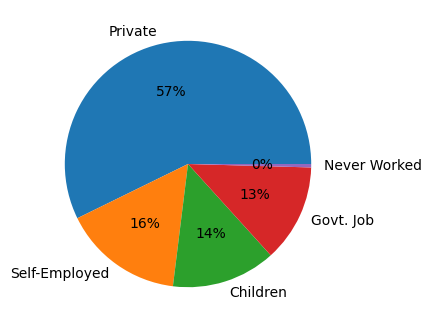

In [30]:
# list for the work_type column
work_type = ['Private','Self-Employed','Children','Govt. Job','Never Worked']

# make an object which store value count of the elements in work_type column
work_type_data = pd.Series(df['work_type']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,4))

# ploting pie chart
plt.pie(work_type_data,labels=work_type,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7cfa7aee3400>,
 [Text(-0.025345515982636815, 1.099707963424642, 'Urban'),
  Text(0.025345413020546048, -1.0997079657976558, 'Rural')],
 [Text(-0.01382482689962008, 0.599840707322532, '51%'),
  Text(0.013824770738479661, -0.5998407086169031, '49%')])

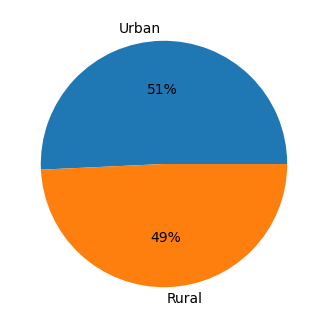

In [31]:
# list for the Residence_type column
Residence_type = ['Urban','Rural']

# make an object which store value count of the elements in Residence_type column
residence_type_data = pd.Series(df['Residence_type']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,4))

# ploting pie chart
plt.pie(residence_type_data,labels=Residence_type,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7cfa7f86a620>,
 [Text(0.41345956848245324, 1.019338601854312, 'Never Smoked'),
  Text(-1.0825052746740849, -0.1954029946105854, 'Unknown'),
  Text(0.10124768212643617, -1.0953305012022738, 'Formerly Smoked'),
  Text(0.97985128217811, -0.49989145303146976, 'Smokes')],
 [Text(0.225523400990429, 0.5560028737387156, '38%'),
  Text(-0.5904574225495007, -0.10658345160577384, '30%'),
  Text(0.055226008432601545, -0.5974530006557857, '17%'),
  Text(0.5344643357335145, -0.27266806528989257, '15%')])

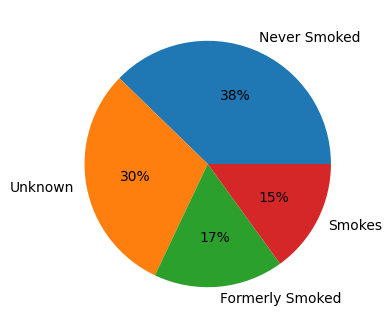

In [32]:
# list for the smoking_status column
smoking_status = ['Never Smoked','Unknown','Formerly Smoked','Smokes']

# make an object which store value count of the elements in smoking_status column
smoking_status_data = pd.Series(df['smoking_status']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,4))

# ploting pie chart
plt.pie(smoking_status_data,labels=smoking_status,autopct='%.0f%%')

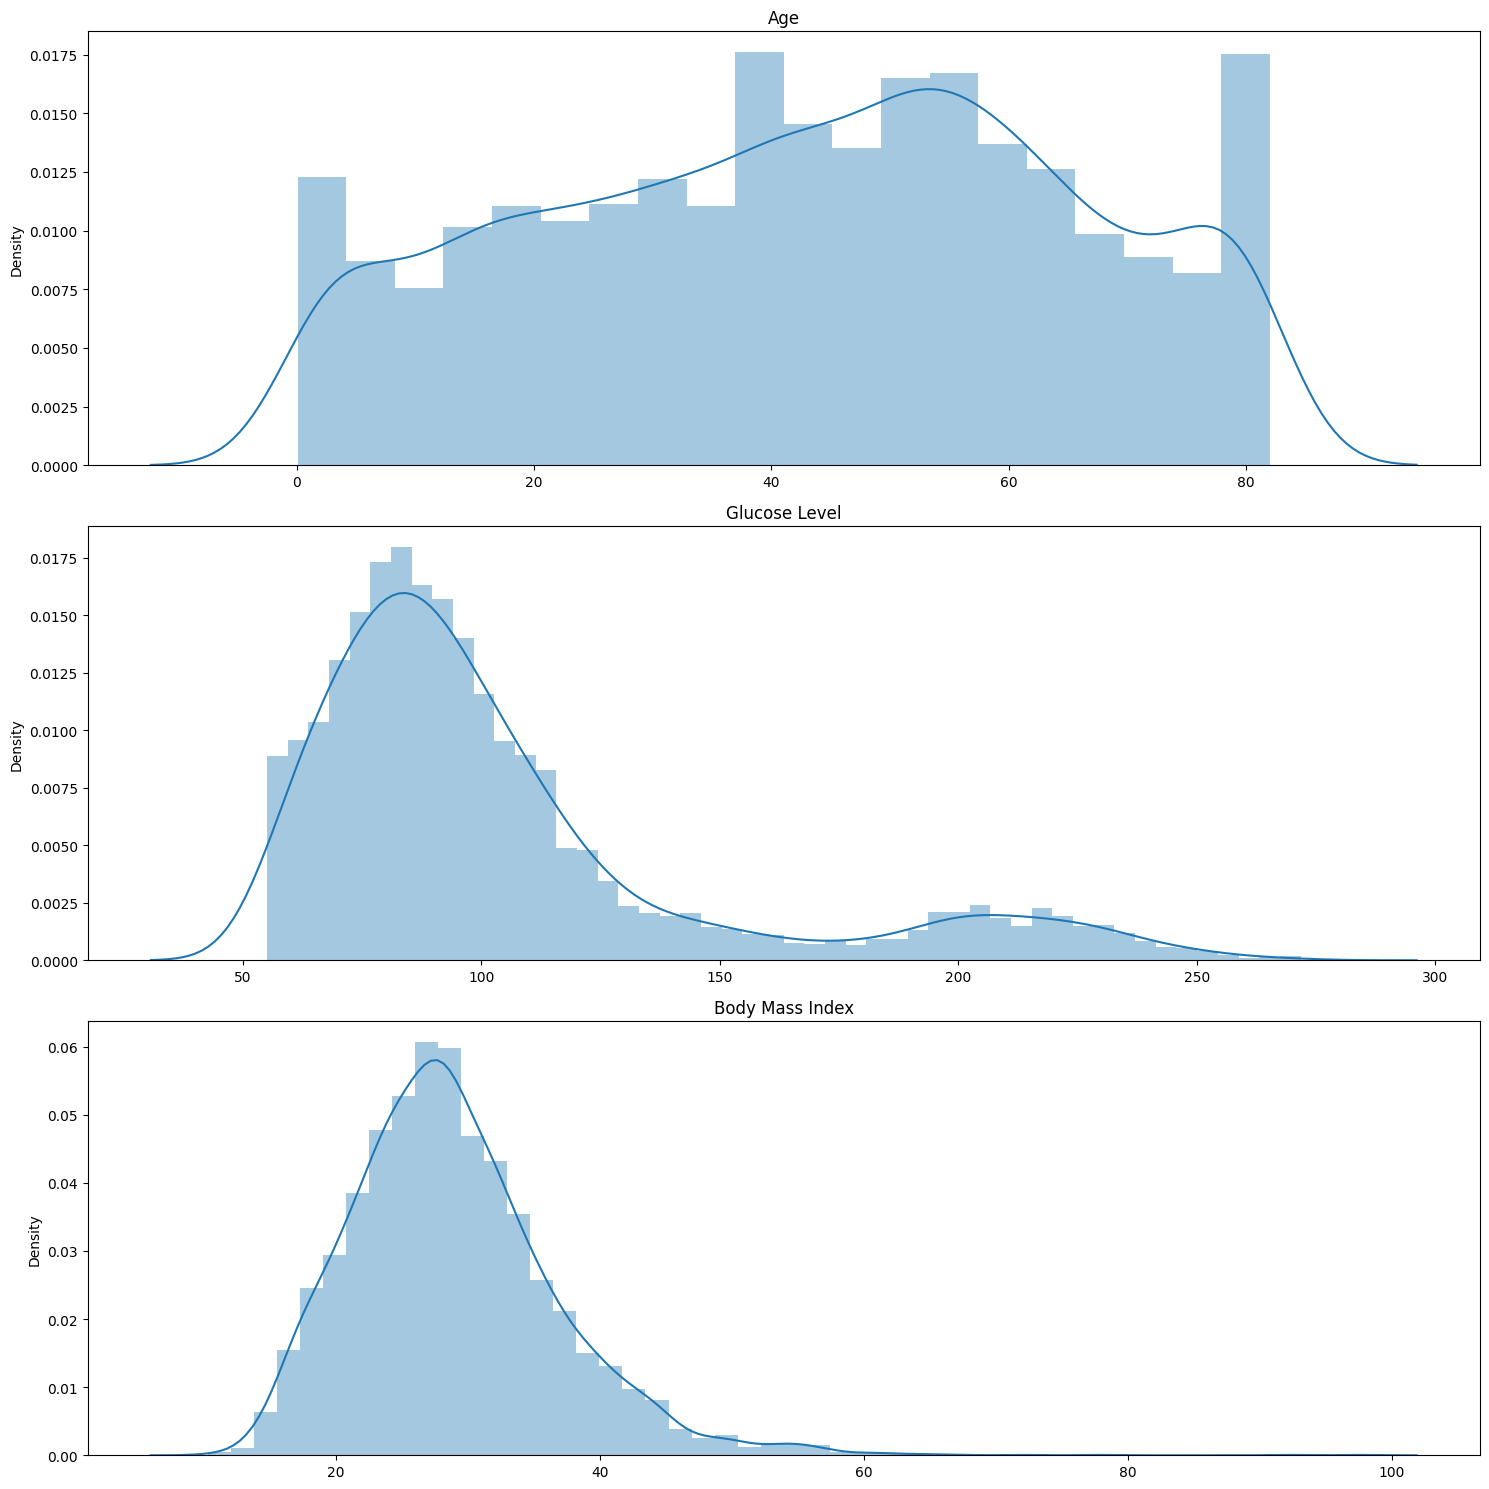

In [33]:
# let's see the distribution of real numbers columns with the help of kde plot
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.distplot(x=df['age'],kde=True)
plt.title('Age')

plt.subplot(3,1,2)
sns.distplot(x=df['avg_glucose_level'],kde=True)
plt.title('Glucose Level')

plt.subplot(3,1,3)
sns.distplot(x=df['bmi'],kde=True)
plt.title('Body Mass Index')

plt.tight_layout()

<Axes: xlabel='gender', ylabel='count'>

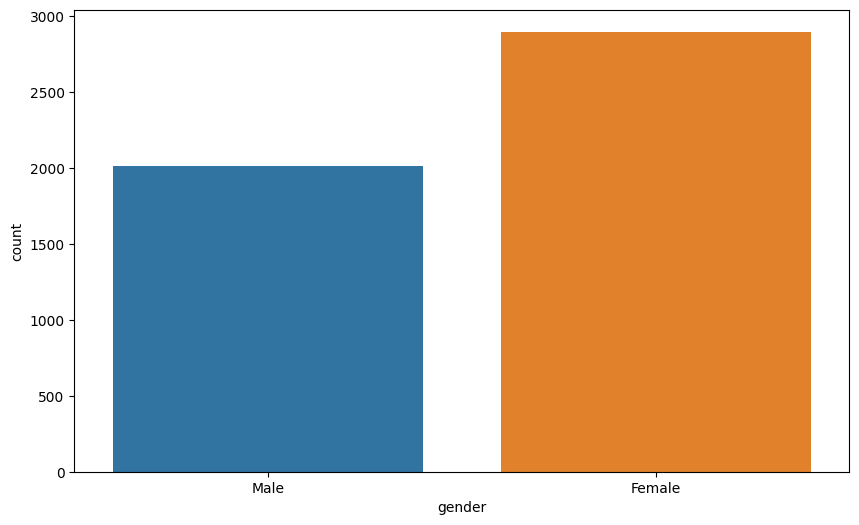

In [34]:
# create a countplot for Gender column
plt.figure(figsize=(10,6))
sns.countplot(x='gender',data=df)

<Axes: xlabel='work_type', ylabel='count'>

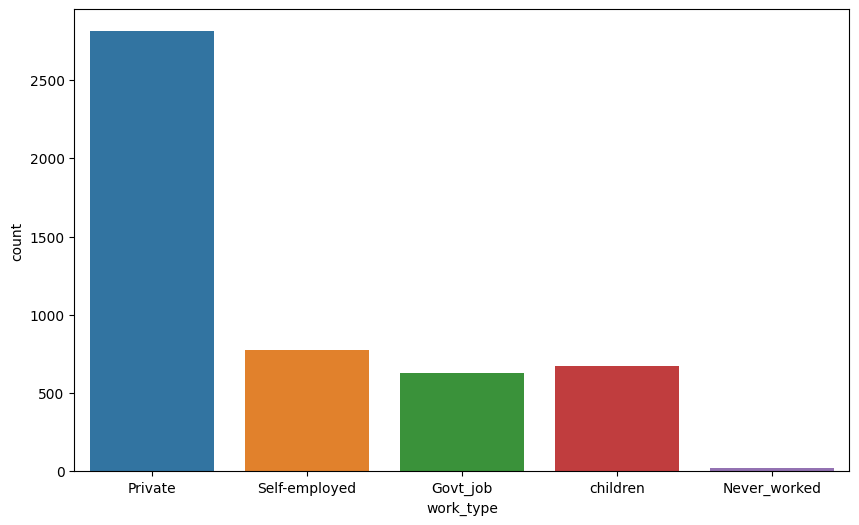

In [35]:
# create a countplot for Work Type column
plt.figure(figsize=(10,6))
sns.countplot(x='work_type',data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

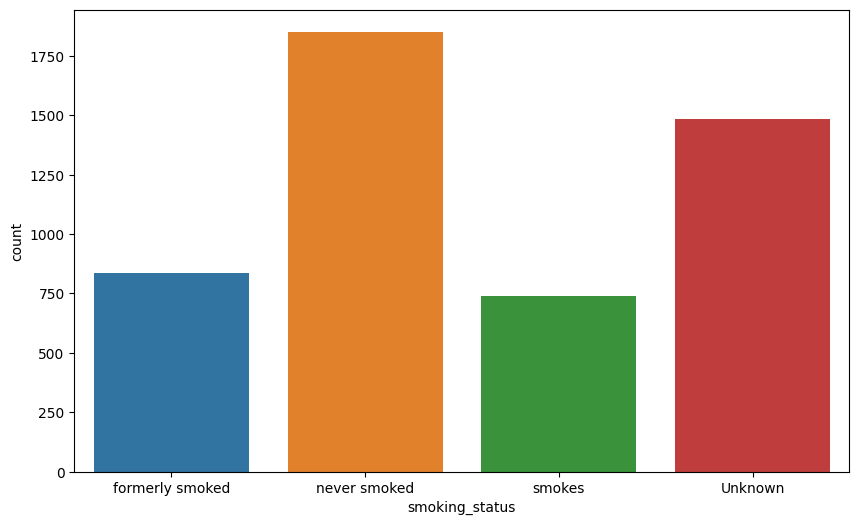

In [36]:
# create a countplot for Smoking Status column
plt.figure(figsize=(10,6))
sns.countplot(x='smoking_status',data=df)

<Axes: xlabel='stroke', ylabel='count'>

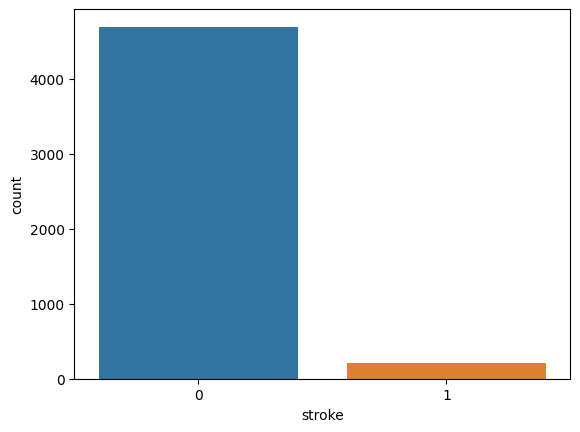

In [37]:
# create a countplot for target variable 'stroke' column
sns.countplot(x='stroke',data=df)

**Note**: Here we are able to see that provided dataset is imbalance means in our dataset most number of patients are not suffering from stroke (4500+) and minimun number of patients suffer from stroke around (200 - 300). So, this will effect on our machine learning model future. Hence, we will just continue this project for learning purpose, althrough our model perform worse for real time data and it will perform wrong predictions.

0 indicates patient not suffer from stroke and 1 indicates patient suffer from stroke.

### Bivariate Analysis

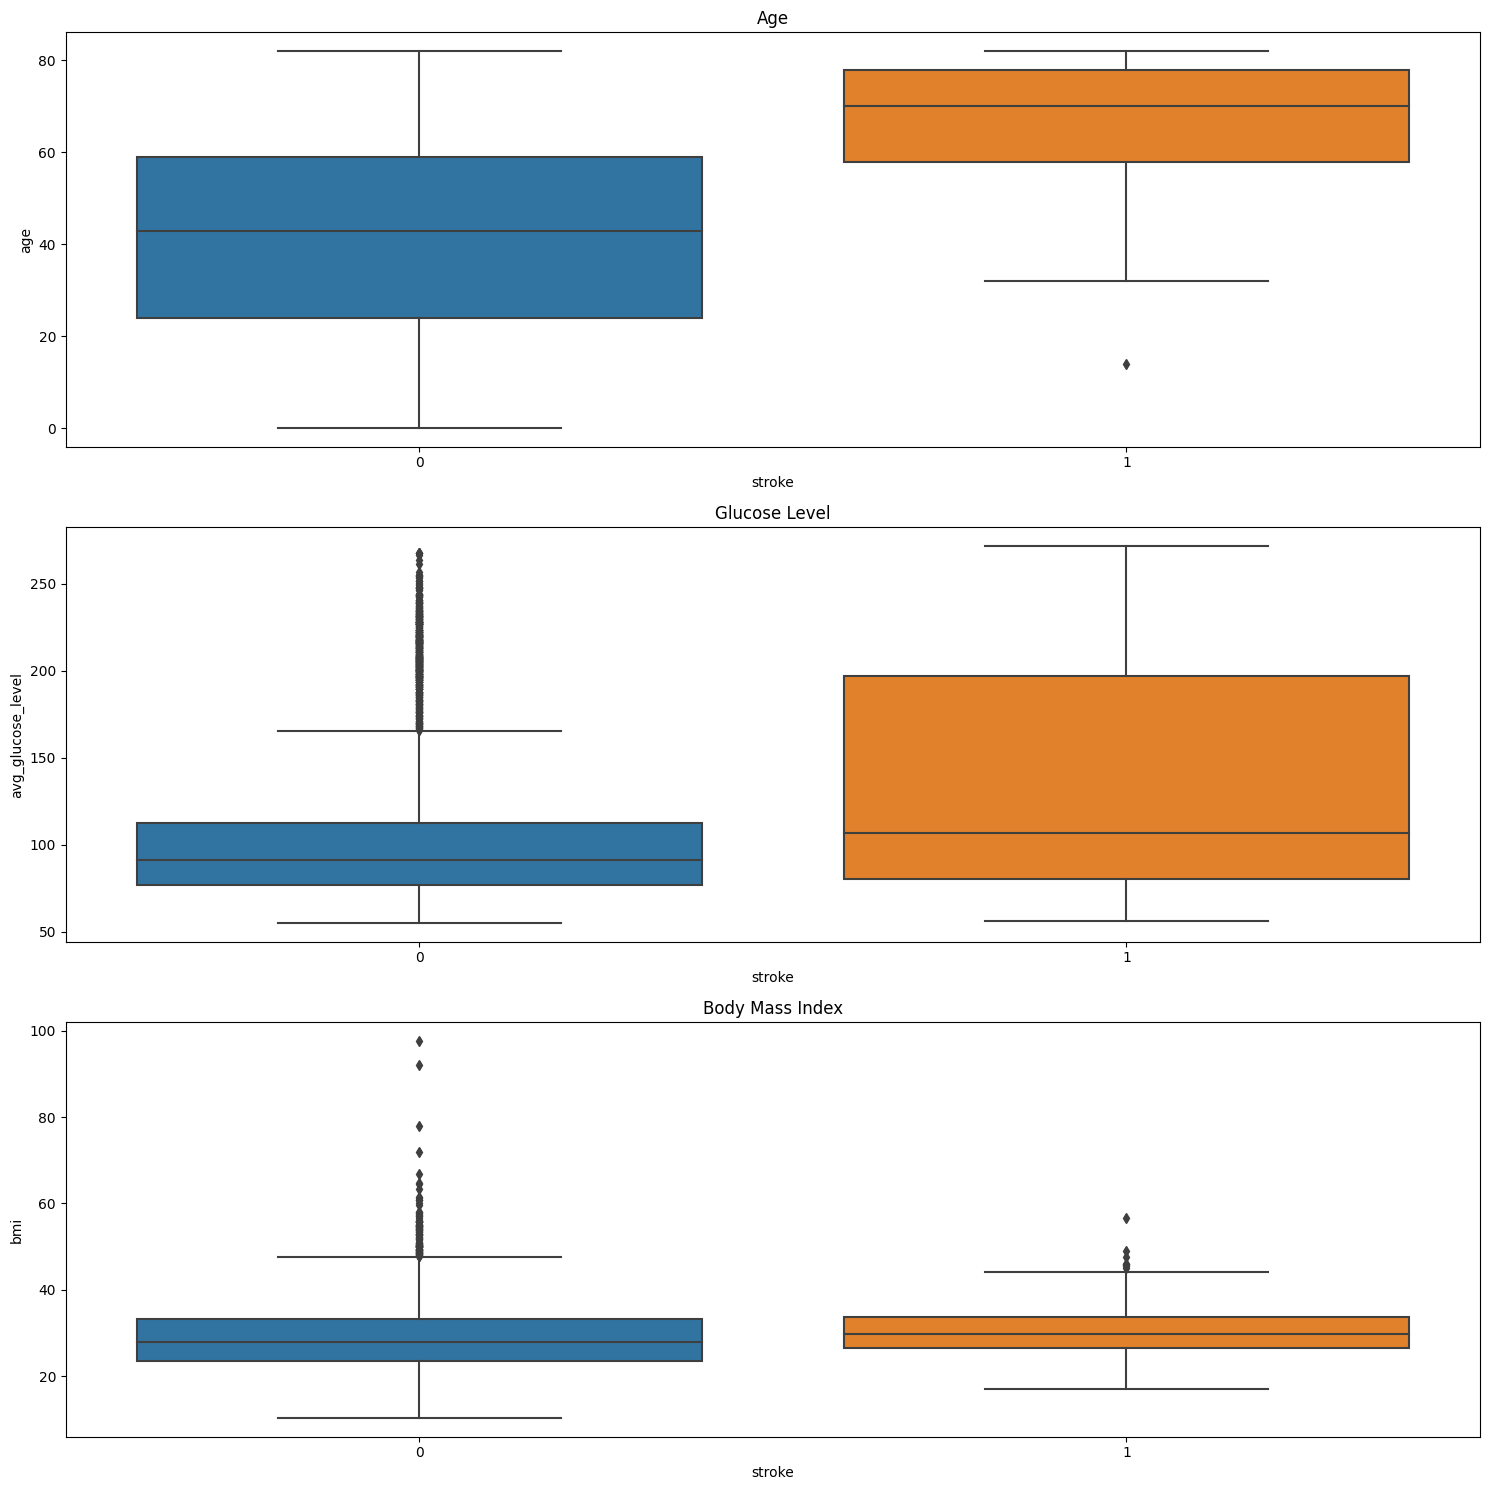

In [38]:
# let's plot the boxplot for all numeric continous columns w.r.t target feature
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.boxplot(x=df['stroke'],y=df['age'],data=df)
plt.title('Age')

plt.subplot(3,1,2)
sns.boxplot(x=df['stroke'],y=df['avg_glucose_level'],data=df)
plt.title('Glucose Level')

plt.subplot(3,1,3)
sns.boxplot(x=df['stroke'],y=df['bmi'],data=df)
plt.title('Body Mass Index')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Plot of All Features')

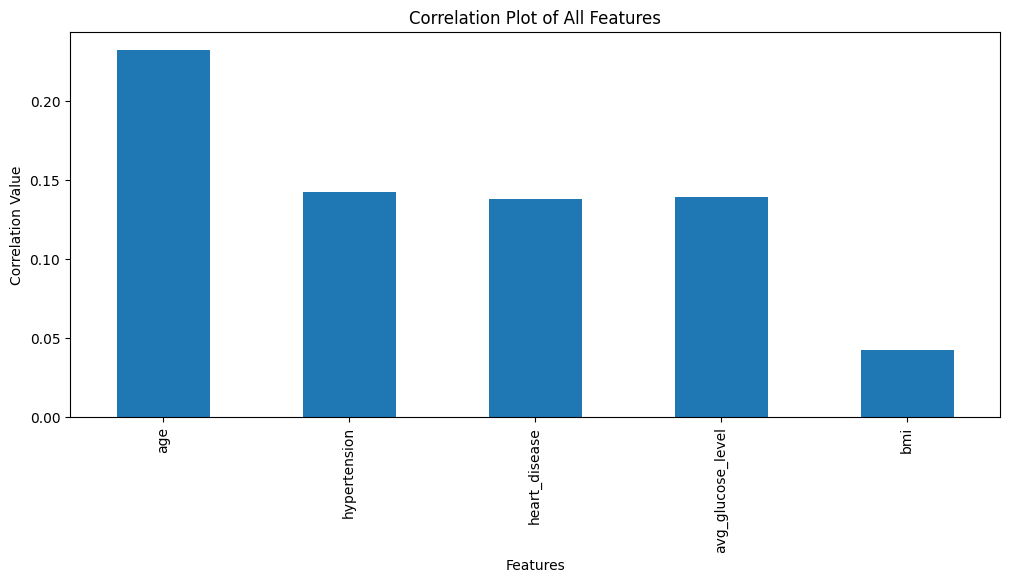

In [39]:
# checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

# plot correlation
df.corr()['stroke'][:-1].plot(kind='bar')

# create a 'x label'
plt.xlabel('Features')

# create a 'y label'
plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')

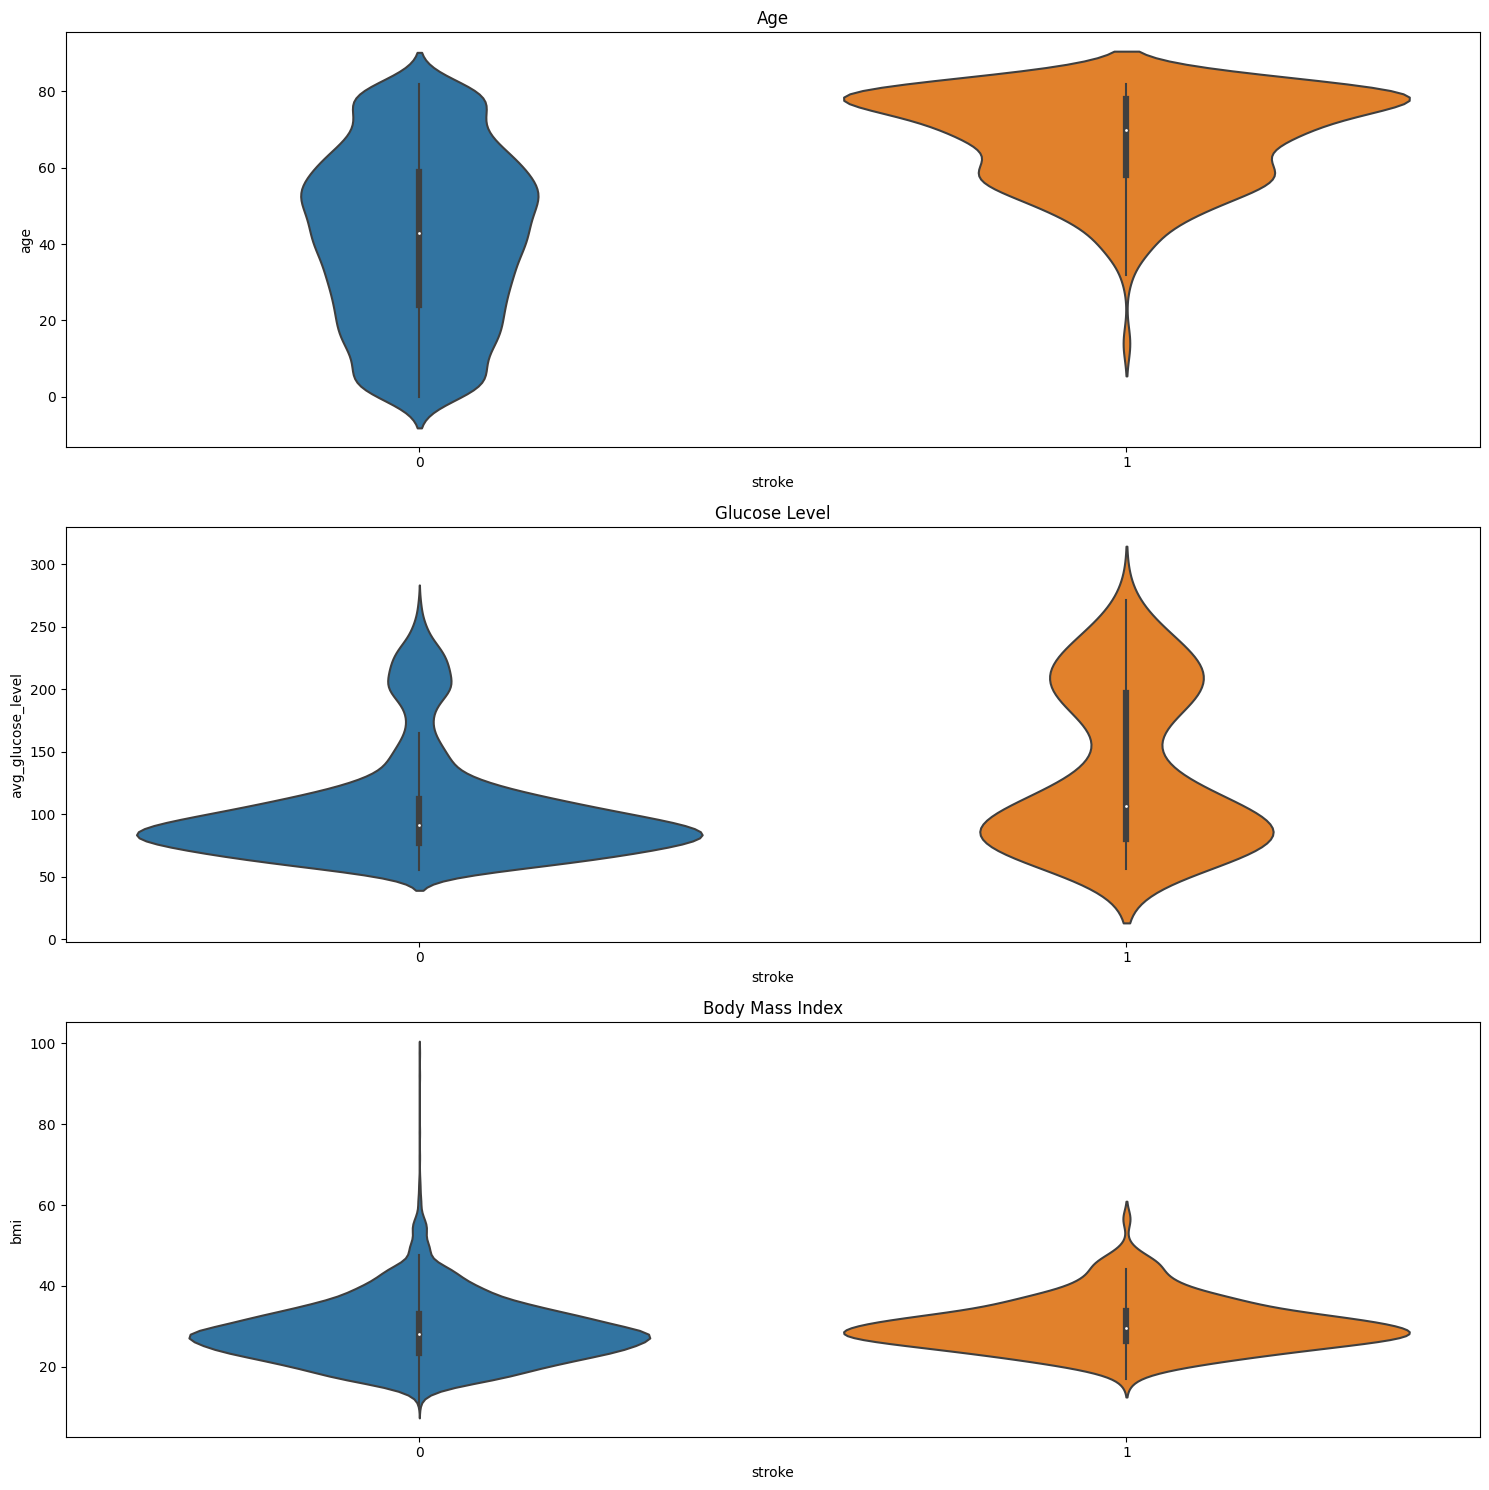

In [40]:
# let's plot the violinplot for all numeric continous columns w.r.t target feature
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.violinplot(x=df['stroke'],y=df['age'],data=df)
plt.title('Age')

plt.subplot(3,1,2)
sns.violinplot(x=df['stroke'],y=df['avg_glucose_level'],data=df)
plt.title('Glucose Level')

plt.subplot(3,1,3)
sns.violinplot(x=df['stroke'],y=df['bmi'],data=df)
plt.title('Body Mass Index')

plt.tight_layout()

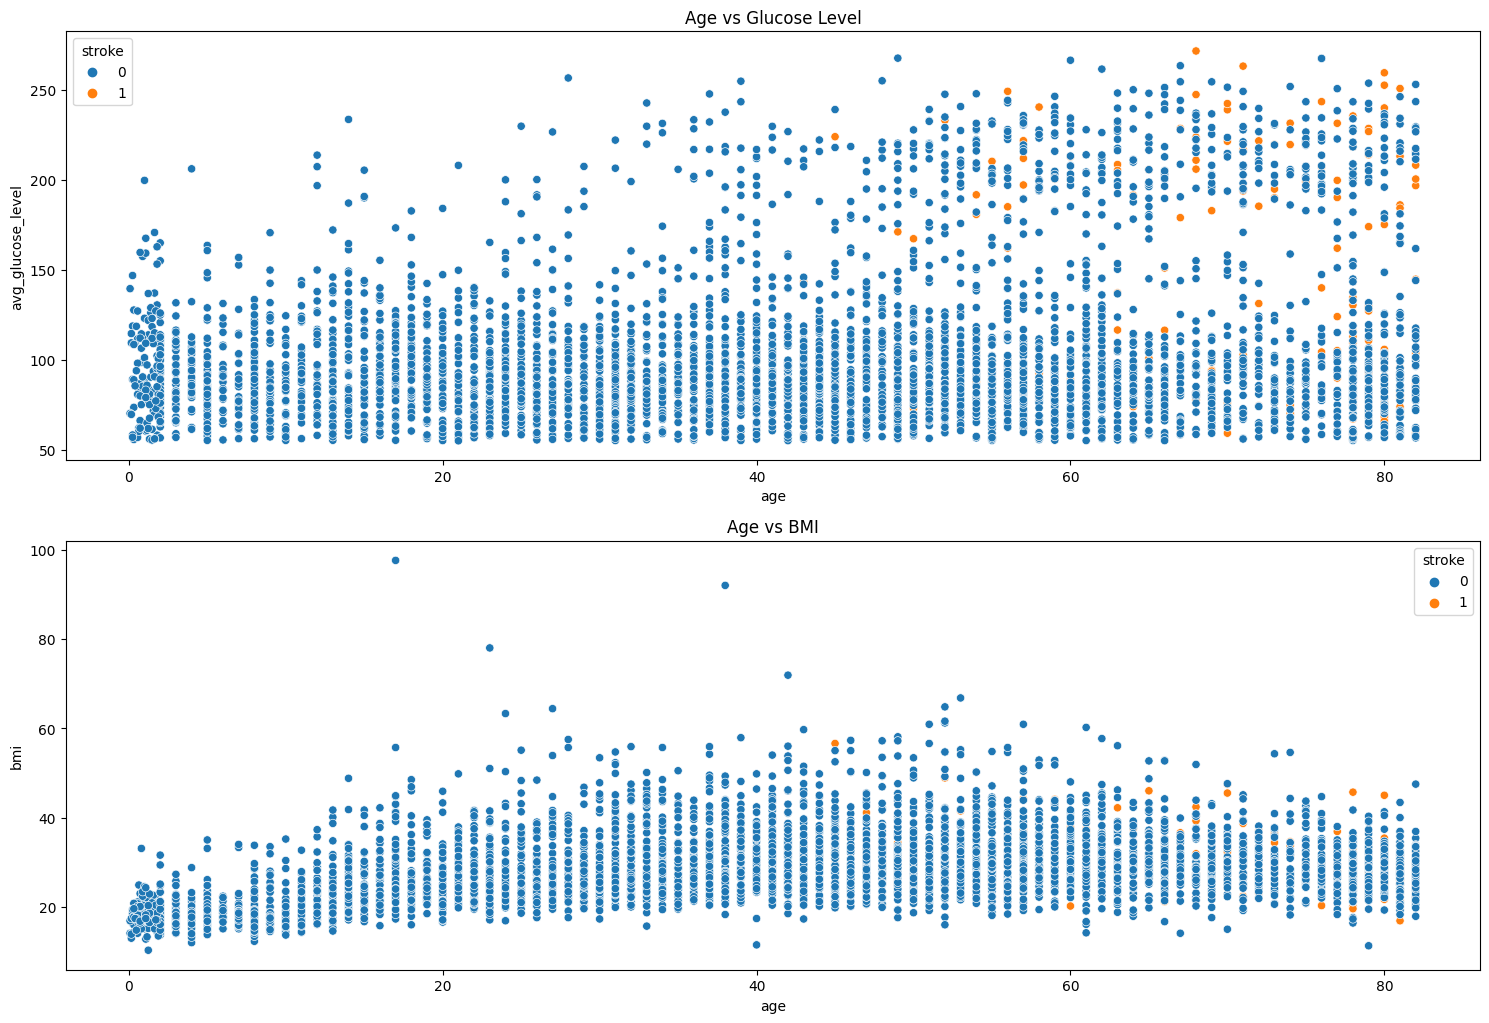

In [41]:
# check the relation between 'Age' vs 'Glucose Level' and 'Age' vs 'BMI' with scatterplot
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue='stroke',data=df)
plt.title('Age vs Glucose Level')

plt.subplot(3,1,2)
sns.scatterplot(x=df['age'],y=df['bmi'],hue='stroke',data=df)
plt.title('Age vs BMI')

plt.tight_layout()

Text(0.5, 1.0, 'BMI vs Glucose Level')

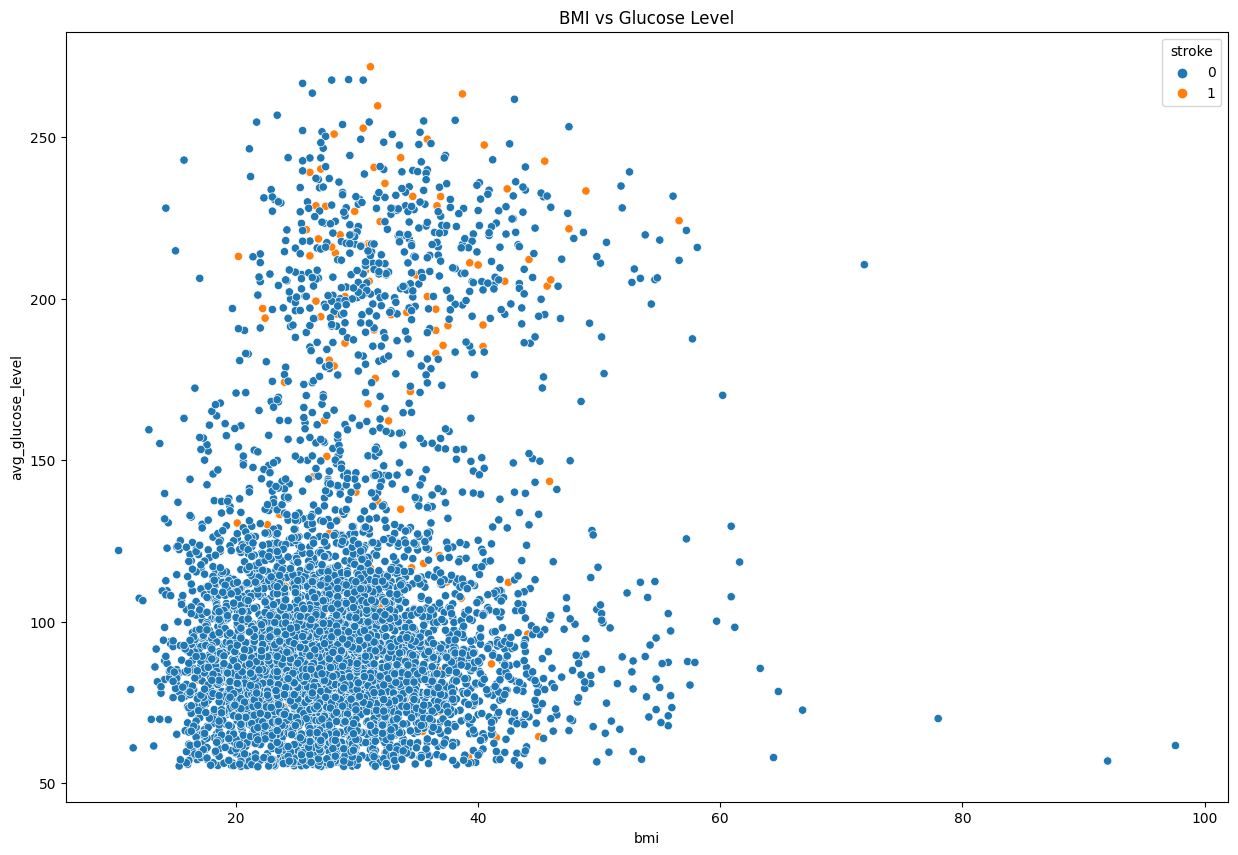

In [42]:
# check the relation between 'BMI' vs 'Glucose Level' with scatterplot
plt.figure(figsize=(15,10))

sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue='stroke',data=df)

plt.title('BMI vs Glucose Level')

### Multi Variate Analysis

Text(0.5, 1.0, 'Heatmap of Dataframe (Without Label Encoding)')

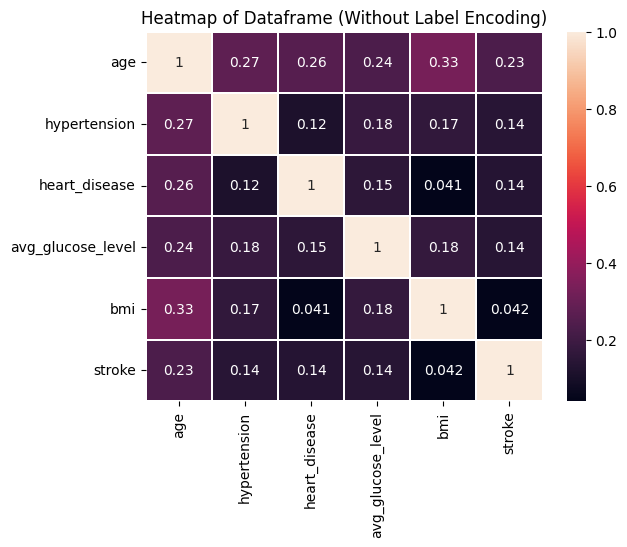

In [43]:
# create a heapmap to visualize the correlation between all features

# create a variable for correlation
df_corr = df.corr()

# plot heatmap
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=0.2)

# set a title
plt.title('Heatmap of Dataframe (Without Label Encoding)')

### Data Preprocessing 2 (Label Encoding )

In [44]:
# import sklearn function 'LabelEncoder' for converting categorical values into numberic
from sklearn.preprocessing import LabelEncoder

# make a variable for LabelEncoder function
label_encoder = LabelEncoder()

'Gender' column Label Encoding

In [45]:
# label encoding of 'Gender' column in dataframe
df['gender'] = label_encoder.fit_transform(df['gender'])

'Ever Married' column Label Encoding

In [46]:
# label encoding of 'Ever Married' column in dataframe
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

'Work Type' column Label Encoding

In [47]:
# label encoding of 'Work Type' column in dataframe
df['work_type'] = label_encoder.fit_transform(df['work_type'])

'Residence Type' column Label Encoding

In [48]:
# label encoding of 'Residence Type' column in dataframe
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

'Smoking Status' column Label Encoding

In [49]:
# label encoding of 'Smoking Status' column in dataframe
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [50]:
# let's us take a look that our features encoded or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.1 KB


Boom! As we are able to see that our all features now in numeric values without increasing the number of columns in dataframe, we can use get_dummy function of pandas library but that increase the number of features in dataframe that will effect on our machine learning model.

### Heatmap

Text(0.5, 1.0, 'Heatmap of Dataframe (After Label Encoding)')

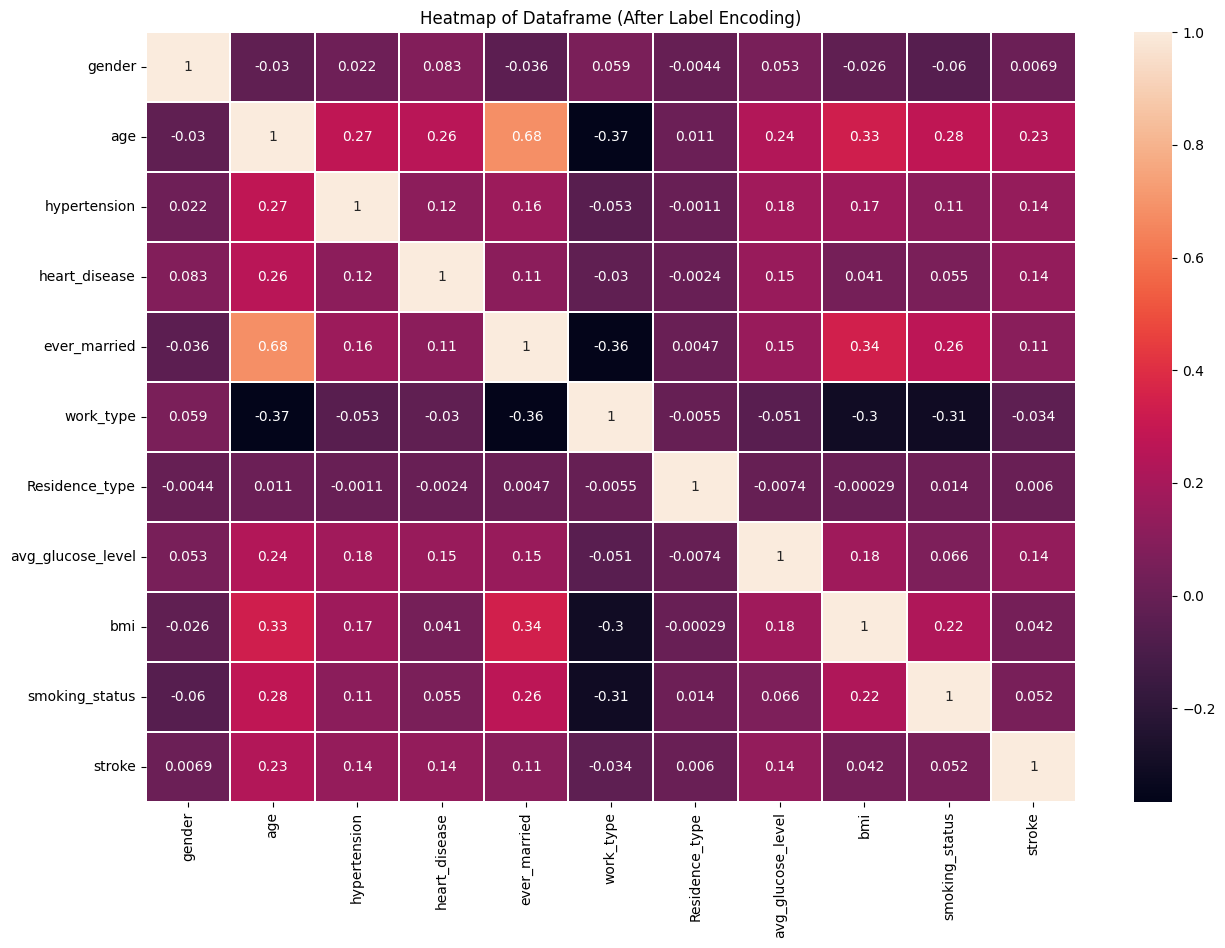

In [51]:
# create a heapmap to visualize the correlation between all features

# adjust the size of heatmap
plt.figure(figsize=(15,10))

# create a variable for correlation
df_corr = df.corr()

# plot heatmap
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=0.2)

# set a title
plt.title('Heatmap of Dataframe (After Label Encoding)')

Text(0.5, 1.0, 'Correlation Plot of All Features')

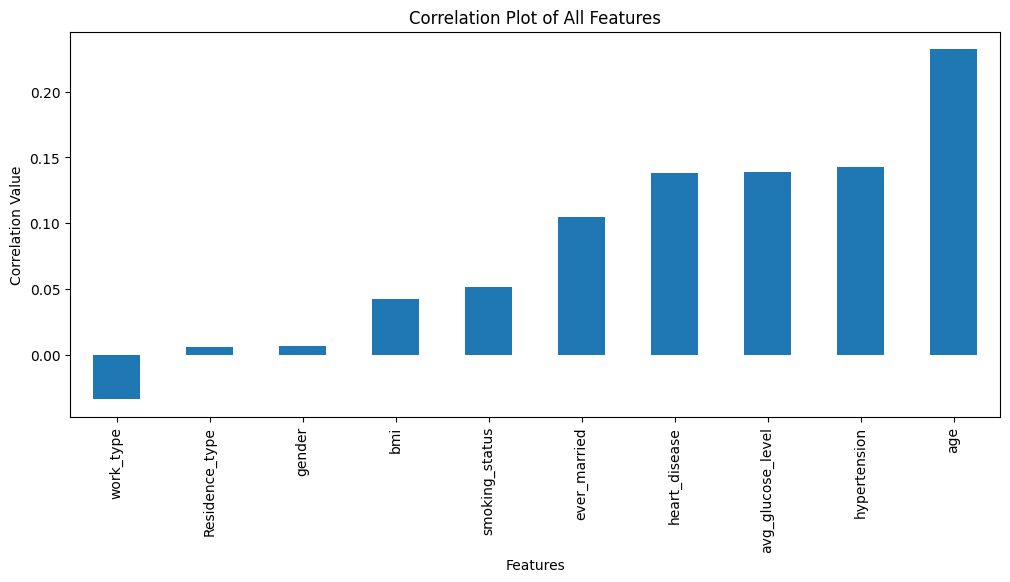

In [52]:
# checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

# plot correlation
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

# create a 'x label'
plt.xlabel('Features')

# create a 'y label'
plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')

## Machine Learning Model

### Import All Libararies Used To Build Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import shap

### Splitting of Data

In [55]:
# splitting data into dependent and independent variables

# independent variable
X = df.drop('stroke',axis=1)

# dependent variable
y = df['stroke']

### Sampling Data (Handling Imbalanced Dataset)

<Axes: xlabel='stroke', ylabel='count'>

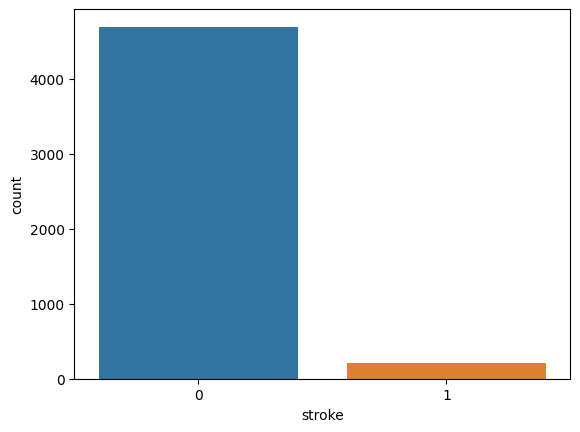

In [56]:
# check the original dataset classes
sns.countplot(x=y,data=df)

In [57]:
# using sampling technique to balance the classes

# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_res))

Original dataset shape Counter({0: 4699, 1: 209})
Resample dataset shape Counter({1: 4699, 0: 4699})


<Axes: xlabel='stroke', ylabel='count'>

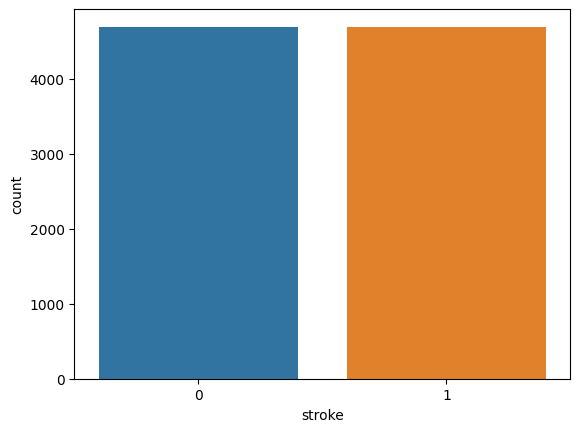

In [58]:
# check the dataset classes after resampling
sns.countplot(x=y_res,data=df)

In [59]:
# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [60]:
# shape of all training and testing data variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6578, 10), (2820, 10), (6578,), (2820,))

### Scaling Train and Test Data

In [61]:
# make a variable for 'MinMaxScale' function
scaler = MinMaxScaler()

# scaling training data variable
X_train = scaler.fit_transform(X_train)

# scaling testing data variable
X_test = scaler.transform(X_test)

### Making an Object

In [62]:
# making an object for all machine-learning algorithms
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb = MultinomialNB()

### Accuracy Check For All Algorithms

In [63]:
# making a list of all used ml algorithms
ml_names = ['Logistic Reg.','Decision Tree','Random Forest','SVM','K Nearest Neighbor',
           'Naive Bayes']

# making a list of all used ml algorithms object
ml_object = [lr,dtree,rfc,svm,knn,nb]

# using for loop to check the accuracy for all algorithms
print('Accuracy of all Algorithms\n')
# using both lists in our loop
for i,j in zip(ml_names,ml_object):

    # training our all algorithms
    j.fit(X_train,y_train)

    # make predictions for all algorithms with the help of test data
    pred = j.predict(X_test)

    # printing accuracy for all algorithms
    print(f'{i} : {accuracy_score(y_test,pred)*100:.2f}%\n')

Accuracy of all Algorithms

Logistic Reg. : 78.05%

Decision Tree : 97.59%

Random Forest : 99.40%

SVM : 81.60%

K Nearest Neighbor : 93.44%

Naive Bayes : 66.49%



### Log Loss Check for All Algorithms

In [64]:
# making a list of all used ml algorithms
ml_names = ['Logistic Reg.','Decision Tree','Random Forest','SVM','K Nearest Neighbor',
           'Naive Bayes']

# making a list of all used ml algorithms object
ml_object = [lr,dtree,rfc,svm,knn,nb]

# using for loop to check the log loss for all algorithms
print('Log Loss of all Algorithms\n')
# using both lists in our loop
for i,j in zip(ml_names,ml_object):

    # training our all algorithms
    j.fit(X_train,y_train)

    # make predictions for all algorithms with the help of test data
    pred = j.predict(X_test)

    # printing log loss for all algorithms
    print(f'{i} : {log_loss(y_test,pred):.2f}\n')

Log Loss of all Algorithms

Logistic Reg. : 7.91

Decision Tree : 0.92

Random Forest : 0.19

SVM : 6.63

K Nearest Neighbor : 2.36

Naive Bayes : 12.08



As we see all the algorithms works well and all gives 90%+ accuracy for our testing data. But, we need only one algorithms to make prediction. So, we are going to work on top 3 algorithms which work amazing above on the basis of Accuracy score (need max. score) and Log Loss score (need min. score).

        Algorithms              Accurcay Score            Log Loss Score
    ---------------------------------------------------------------------
    1. Random Forest              99.40%                    0.19
    2. Decision Tree              97.59%                    0.92

### Evaluation of Selected Algorithms

In [65]:
# making a list of selected ml algorithms
ml_names = ['Random Forest','Decision Tree','K Nearest Neigbhor']

# making a list of selected ml algorithms object
ml_object = [rfc,dtree,knn]

# using for loop to check the confusion matric and classification report for selected algorithms
# using both lists in our loop
for i,j in zip(ml_names,ml_object):
    print(f'{i} Evaluation:\n')
    # training our all algorithms
    j.fit(X_train,y_train)

    # make predictions for all algorithms with the help of test data
    pred = j.predict(X_test)

    # printing classification report for all algorithms
    print(f'{i} Classification Report:')
    print(f'{classification_report(y_test,pred)}\n')

    # printing confusion matrix for all algorithms
    print(f'{i} Confusion Matrix:')
    print(f'{confusion_matrix(y_test,pred)}\n')
    print('='*70)

Random Forest Evaluation:

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1407
           1       0.99      1.00      1.00      1413

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820


Random Forest Confusion Matrix:
[[1393   14]
 [   0 1413]]

Decision Tree Evaluation:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1407
           1       0.95      1.00      0.98      1413

    accuracy                           0.98      2820
   macro avg       0.98      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820


Decision Tree Confusion Matrix:
[[1339   68]
 [   0 1413]]

K Nearest Neigbhor Evaluation:

K Nearest Neigbhor Classification Report:
              precisio

### Random Forest

In [66]:
# Performing Hyperparameter tuning for more accurate performance

# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [10, 20, 30],                 # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rfc_model = grid_search.best_estimator_

# Make predictions with the best model
rfc_pred = best_rfc_model.predict(X_test)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

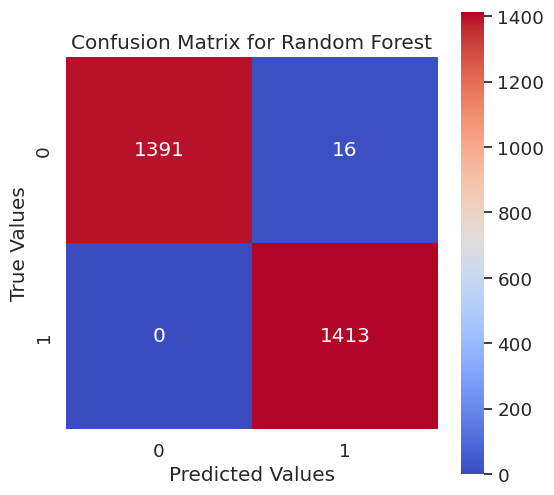

In [67]:
# making confusion matrix
cm = confusion_matrix(y_test,rfc_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the random forest model
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Random Forest') # title of the confusion matrix

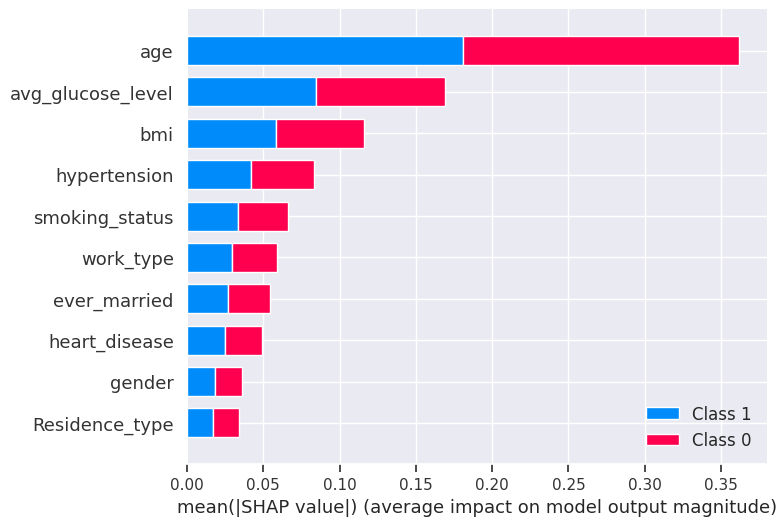

In [68]:
# shap plot for the random forest model
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

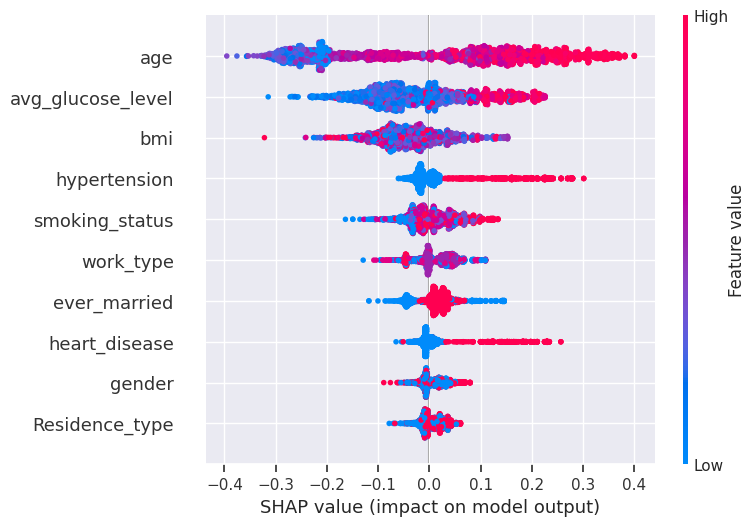

In [69]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test,feature_names=X.columns)

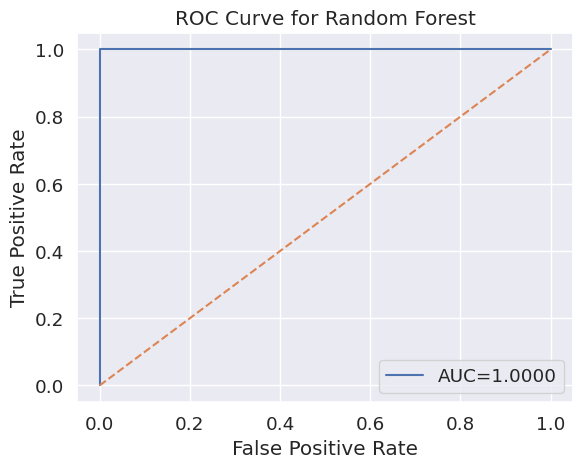

In [70]:
# ROC and AUC score for the random forest model
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])],axis=1)
rfc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])
auc = roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()

### Decision Tree

In [71]:
# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dtree_model = grid_search.best_estimator_

# Make predictions with the best model
dtree_pred = best_dtree_model.predict(X_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

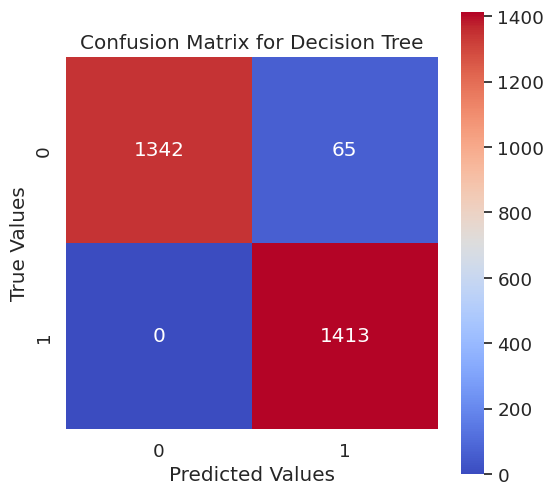

In [72]:
# making confusion matrix
cm = confusion_matrix(y_test,dtree_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the decision tree model
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Decision Tree') # title of the confusion matrix

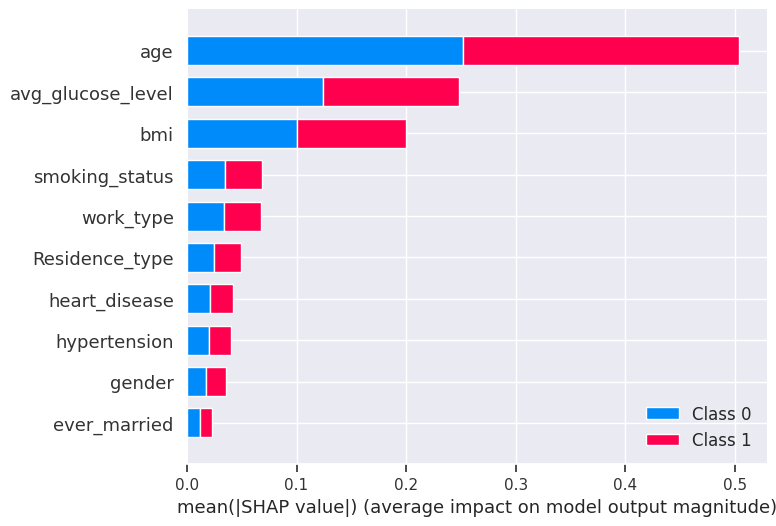

In [73]:
# shap plot for the decision tree model
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

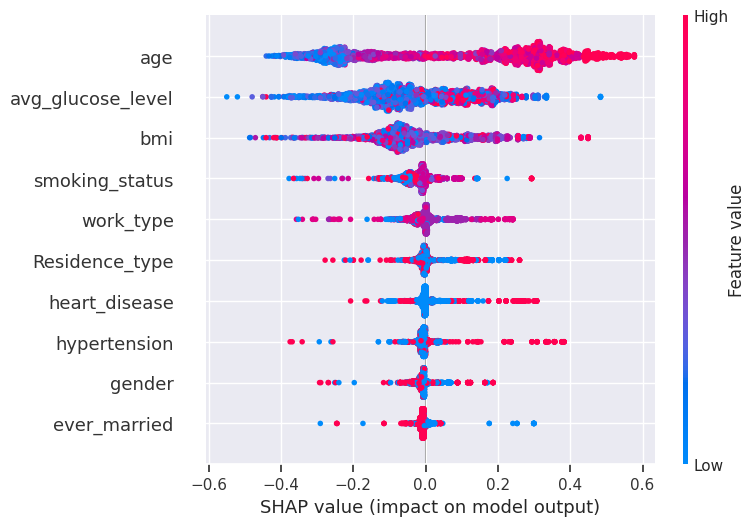

In [74]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test,feature_names=X.columns)

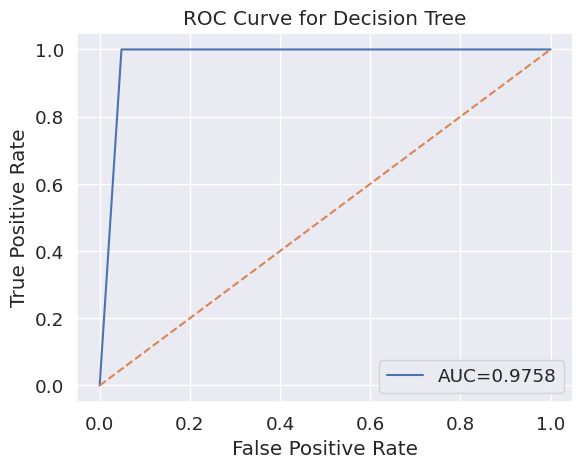

In [75]:
# ROC and AUC score for the decision tree model
dtree_pred_prob = dtree.predict_proba(X_test)[:][:,1]

dtree_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(dtree_pred_prob,columns=['y pred prob'])],axis=1)
dtree_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(dtree_actual_predict['y actual'],dtree_actual_predict['y pred prob'])
auc = roc_auc_score(dtree_actual_predict['y actual'],dtree_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()

### Saving Decision Tree Model

In [76]:
import pickle

In [88]:
# use dump() function to save the model with pickle
save_dtree_model = pickle.dumps(best_dtree_model)

# use load() function to loading the saved model
dtree_from_pickle = pickle.loads(save_rfc_model)

# after loading, use test data to predict the outcome
dtree_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [89]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [90]:
rfc_from_pickle.predict([[1,67.0,0,1,1,2,1,228.69,36.6,1]])

array([1])

## Conclusions/Report

**Data Analysis:**
1. Working People's like: Govt. Job, Private and Self-Employeed are has high 'Glucose Level' and 'BMI'.
2. Paitents who smoke formerly has high 'Glucose Level' and 'BMI'.
3. People who married (mean age 54 years), they suffer from high hypertension, heart disease, glucose level and BMI, that why they suffer from stroke.
4. Most of Stroke cases found in Females as compare to Males.
5. Most of the paitents Never Smoke but, still suffer from Stroke.
6. Mean BMI is around 29.5 approx.
7. **Note:** We have most number paitents data who not suffer from Stroke. This will impact on ML model. (Imbalance Dataset)
8. Feature 'Age' and 'Ever Married' are more correlated to each other, which make sense because people most likely to married a particular age and at the age of 50 most of the peoples are married.
9. Features like: 'Age', 'Hypertension', 'Glucose Level', 'Heart Disease' and 'Ever Married' are the most correlated features with Stroke feature, it make sense because according to our research they all make high impact in stroke cases. (Positive Correlation)
10. Work Type also impact on the stroke cases. (Negative Correlation)

**Machine Learning Model:**
1. Sampling the dataset to make a equal classes dataset or balance the dataset to make most accurate model.
2. Scaling the training and testing independent data to make all values in range of 0 to 1 using MinMaxScaler() method.
3. Identifing the accuracy and log loss for all machine-learning algorithms. And pick top 3 algorithms.
4. Evaluate top 3 algorithms by identifing classification report and confusion report.
5. So, we got algorithms like: Random Forest, Decision Tree and K Nearest Neigbhor according to log loss, accuracy and other evaluation metrices.
6. Random Forest and Decision Tree perform out-standing. So, we will work on it to make our prediction model and check it on new data.
7. 'Age', 'Glucose Level' and 'BMI' has the high feature importance for our models (both Random Forest and Decision Tree).
8. Random Forest is capable to contain whole area in our ROC plot, which means Random Forest is capable to draw accurate prediction on new data.
9. Althrogh, Decision Tree also perform amazing in ROC plot with 0.97 or 97% prediction rate.
10. We will use Decision Tree Model to make predictions.

**NOTE: As we know from data analysis part that our dataset have imbalanced classes and later we perform 'Resampling' method to handle it. Althrough, we successfully done it and our models perform well. But, this also show biases because, in resampling we will take random samples or duplicate sample to balance our dataset, that's why our model is not much perform well for new data or real time data.
This is a learning purpose project which gives you idea how to do analysis, resampling and making machine-learning model. So, don't execute same to same as I do, something try with yourself to handle in a best way.**